# Part One
Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('logins.json', 'r') as datafile:
        data_log = json.load(datafile)
df_log = pd.DataFrame(data_log)
df_log = df_log.sort_values('login_time') 

In [3]:
df = pd.read_json(r"logins.json")

In [4]:
df.shape

(93142, 1)

In [5]:
df_logins_15 = df.resample("15min", on="login_time").count()
df_logins_15.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df_logins_15.index.name = "Login_time"
df_logins_15.reset_index(inplace=True)
df_logins_15.rename({"login_time":"count_15min"}, axis=1, inplace=True)

In [7]:
df_logins_15.head()

,Login_time,count_15min
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
#extracting hours and days
df_logins_15["hour"] = df_logins_15["Login_time"].dt.hour
df_logins_15["day"] = df_logins_15["Login_time"].dt.day_name()
df_logins_15["Month"] = df_logins_15["Login_time"].dt.month

In [9]:
df_logins_15[:10]

,Login_time,count_15min,hour,day,Month
0,1970-01-01 20:00:00,2,20,Thursday,1
1,1970-01-01 20:15:00,6,20,Thursday,1
2,1970-01-01 20:30:00,9,20,Thursday,1
3,1970-01-01 20:45:00,7,20,Thursday,1
4,1970-01-01 21:00:00,1,21,Thursday,1
5,1970-01-01 21:15:00,4,21,Thursday,1
6,1970-01-01 21:30:00,0,21,Thursday,1
7,1970-01-01 21:45:00,4,21,Thursday,1
8,1970-01-01 22:00:00,9,22,Thursday,1
9,1970-01-01 22:15:00,8,22,Thursday,1


In [10]:
df_logins_15["Month"] = df_logins_15["Month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr"})

In [11]:
df_logins_15.head()

,Login_time,count_15min,hour,day,Month
0,1970-01-01 20:00:00,2,20,Thursday,Jan
1,1970-01-01 20:15:00,6,20,Thursday,Jan
2,1970-01-01 20:30:00,9,20,Thursday,Jan
3,1970-01-01 20:45:00,7,20,Thursday,Jan
4,1970-01-01 21:00:00,1,21,Thursday,Jan


In [12]:
# average daily logins per hour
df_day = df_logins_15.groupby(["hour", "day","Month"]).sum().reset_index()
df_day.head()

,hour,day,Month,count_15min
0,0,Friday,Apr,116
1,0,Friday,Feb,264
2,0,Friday,Jan,293
3,0,Friday,Mar,302
4,0,Monday,Apr,58
5,0,Monday,Feb,167
6,0,Monday,Jan,101
7,0,Monday,Mar,205
8,0,Saturday,Apr,265
9,0,Saturday,Feb,312


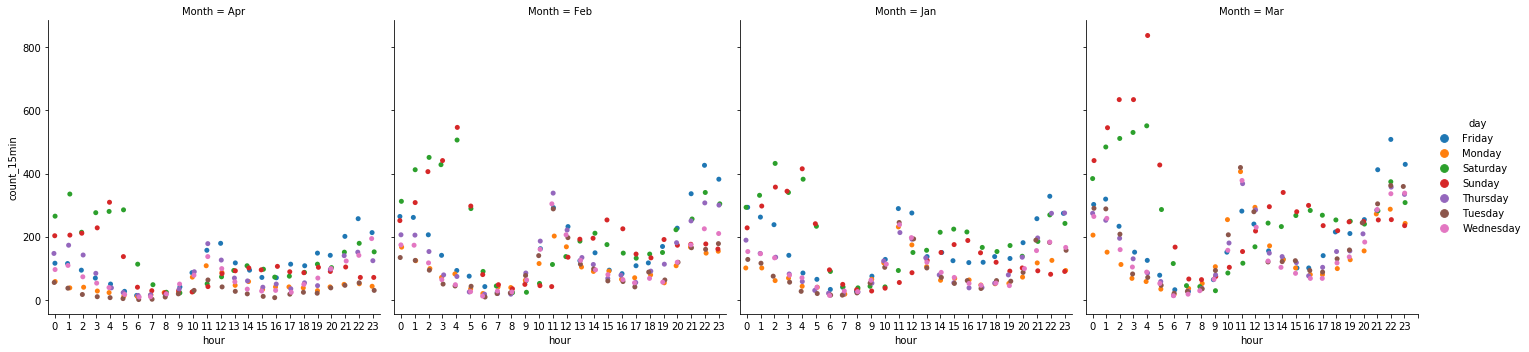

In [13]:
#plotting df
ax = sns.catplot(x="hour", y="count_15min", data=df_day, hue="day",col="Month")
plt.xticks(range(0,25))

#display plot
plt.show()

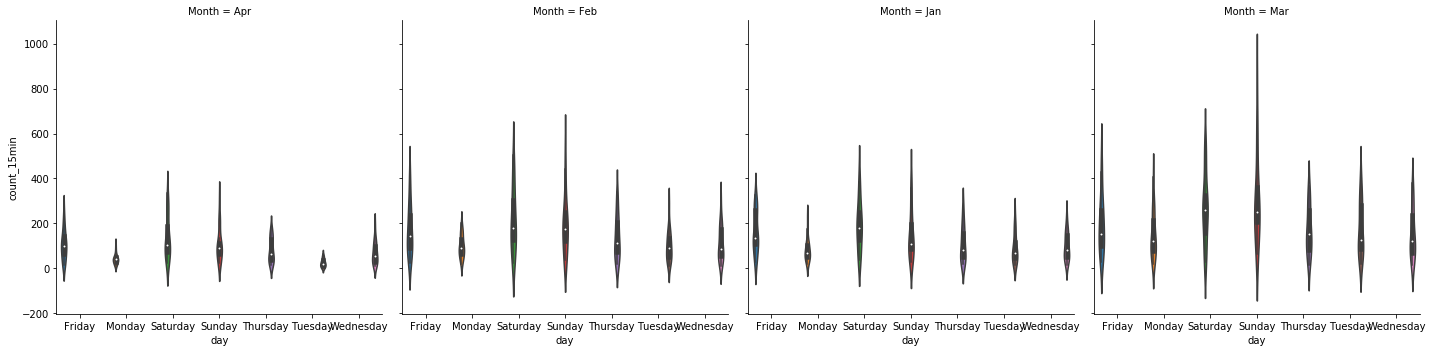

In [14]:
#plotting df
ax = sns.catplot(x="day", y="count_15min", data=df_day, hue="day",col="Month",kind='violin')
#display plot
plt.show()

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
 a. how you will implement the experiment
 b. what statistical test(s) you will conduct to verify the significance of the observation
 c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Solution:
I prefer to choose the toll costs driver parterns in two cities reimbursed and the percentage of the reimbursed costs by total toll costs incharged as the key measure of success of this experiment. Since the toll costs of driver parterns reimbursed increaseing indicates that more driver parterns went to another city. If the percentage of the reimbursed costs by total toll costs incharged increase, it shows that more activities between two cities are taken by driver parterns. The bigger the costs reimbursed and percentage are, the more success this experiment is.

The experiment can be implemented by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver parterns from which city, toll costs incharged. Then we will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing. A significance test can be conducted to verify the significance of the increasment.I will visulize the experiment result of the trend, weekday, time of a day, direction, percentagae, ect. Then prepare a presentation to provide recommendations to the city operations team.

# Part 3
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 3. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## 3.1  Cleaning, exploratory analysis

In [15]:
with open('ultimate_data_challenge.json', 'r') as datafile:
        data = json.load(datafile)
df_ut = pd.DataFrame(data)

In [16]:
df_ut.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [17]:
df_ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
df_ut[['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','phone']].groupby(['phone']).mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
phone,,,,,,,
Android,1.934962,4.627394,1.071718,8.540401,60.403202,5.978743,4.784144
iPhone,2.425944,4.590783,1.076412,9.020797,61.092612,5.701441,4.775132


In [19]:
indexes_of = df_ut['avg_rating_of_driver'].index[df_ut['avg_rating_of_driver'].apply(np.isnan)]

In [20]:
indexes_of

Int64Index([    6,     9,    12,    14,    15,    20,    21,    22,    25,
               28,
            ...
            49954, 49955, 49962, 49971, 49980, 49984, 49985, 49989, 49996,
            49999],
           dtype='int64', length=8122)

In [21]:
## fill nan in "avg_rating_of_driver" with means 
for i in indexes_of:
    if df_ut['phone'][i]=='iPhone':
        df_ut['avg_rating_of_driver'][i]=4.63
    else:
        df_ut['avg_rating_of_driver'][i]=4.59
       

C:\Users\wzxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\wzxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
indexes_by = df_ut['avg_rating_by_driver'].index[df_ut['avg_rating_by_driver'].apply(np.isnan)]

In [23]:
## fill nan in "avg_rating_of_driver" with means 
for i in indexes_by:
    if df_ut['phone'][i]=='iPhone':
        df_ut['avg_rating_by_driver'][i]=4.7841
    else:
        df_ut['avg_rating_by_driver'][i]=4.7751

C:\Users\wzxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\wzxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
df_ut.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778170,4.603792,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.565053,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


II. Exploratory Data Analysis

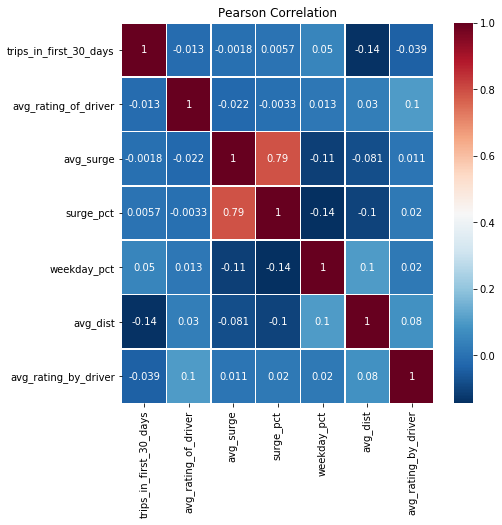

In [26]:
import seaborn as sb
pearsoncorr = df_ut[['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']].corr(method='pearson')

plt.figure( figsize = ( 7, 7 ))
plt.title( 'Pearson Correlation' )

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [27]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

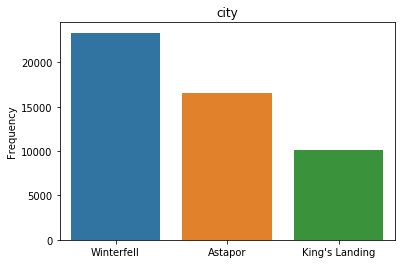

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


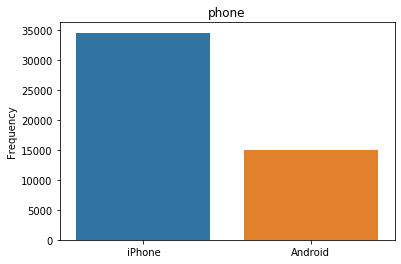

iPhone     34582
Android    15022
Name: phone, dtype: int64


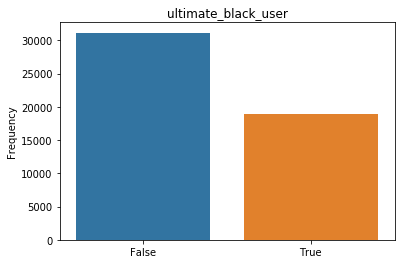

False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [28]:
for feature in categorical_features:
    sns.barplot(x = list(df_ut[feature].value_counts().index), y = df_ut[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df_ut[feature].value_counts())

In [29]:
df_ut.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

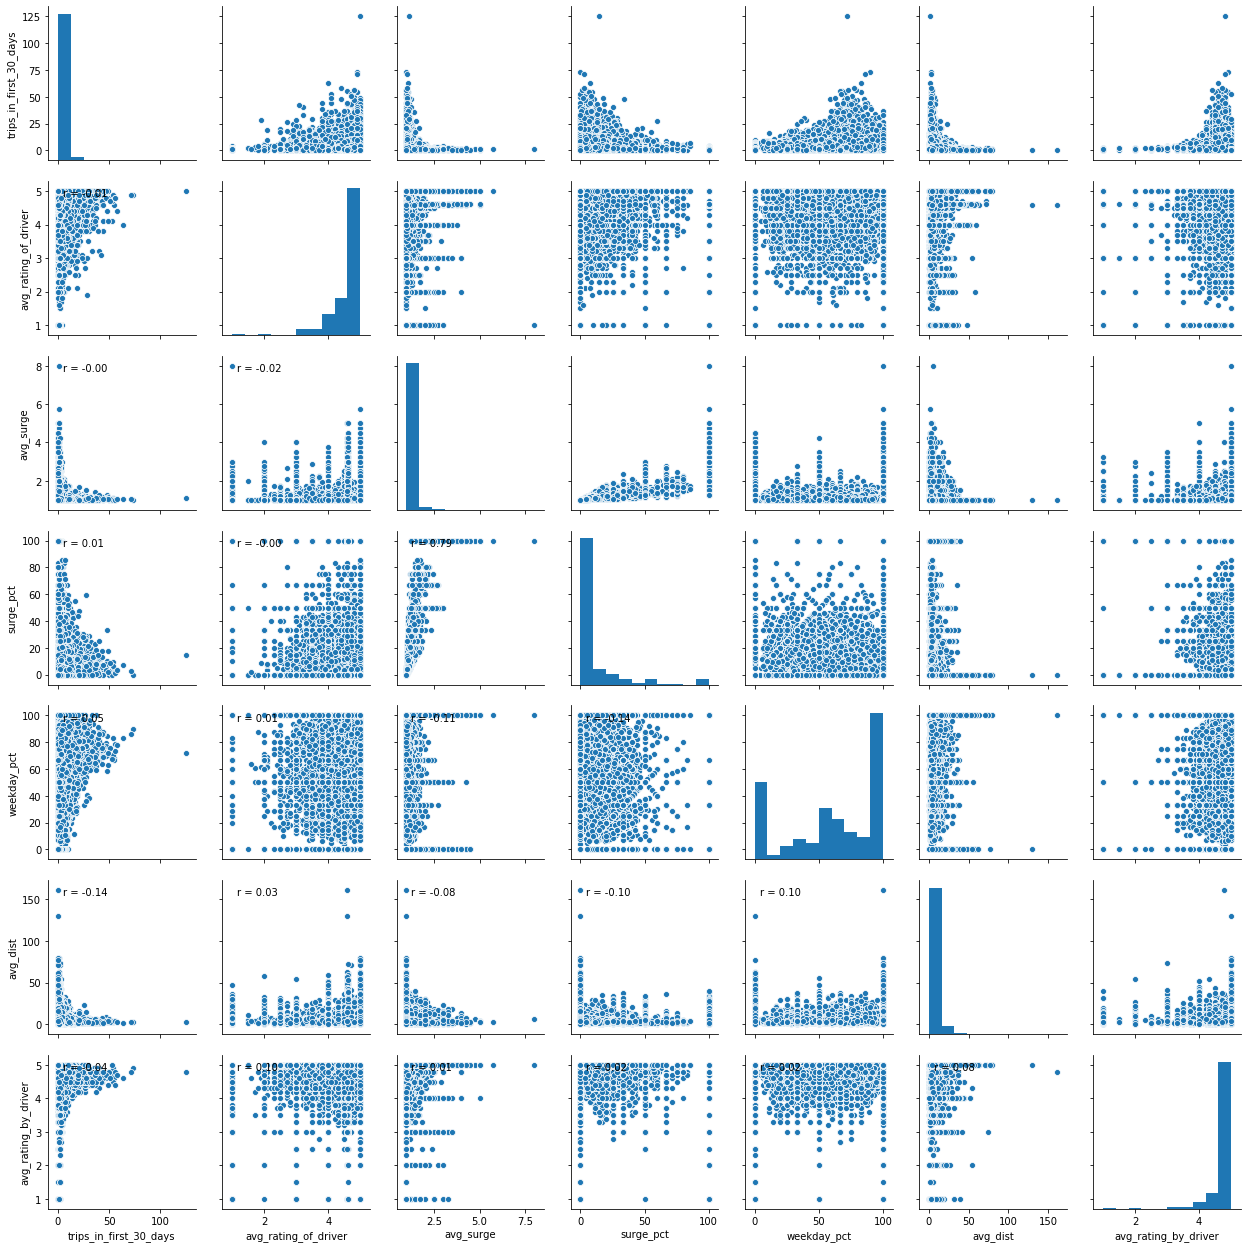

In [30]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r_, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    r = 'r'
    ax.annotate(f'{r} = {r_:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


g=sns.pairplot( df_ut, vars=['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver'])


g.map_lower(corrfunc)
plt.show()

## 3.2 Build a predictive model

In [31]:
# When was the last trip date in the dataset?
sorted(df_ut['last_trip_date'].unique())[-10:]

['2014-06-22',
 '2014-06-23',
 '2014-06-24',
 '2014-06-25',
 '2014-06-26',
 '2014-06-27',
 '2014-06-28',
 '2014-06-29',
 '2014-06-30',
 '2014-07-01']

In [32]:
# When was the first trip date in the dataset?
sorted(df_ut['last_trip_date'].unique())[:10]

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10']

In [46]:
sorted(df_ut['signup_date'].unique())[-10:]

['2014-01-22',
 '2014-01-23',
 '2014-01-24',
 '2014-01-25',
 '2014-01-26',
 '2014-01-27',
 '2014-01-28',
 '2014-01-29',
 '2014-01-30',
 '2014-01-31']

In [47]:
sorted(df_ut['signup_date'].unique())[:10]

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10']

In [41]:
# a function to check the active users within a 30 days of that time. Then it generates a 1 or 0 to a list of active users.

active_users = []
for i in range(len(df_ut)):
    st_date = pd.Timestamp(df_ut['signup_date'][i]) #get start date
    end_date = st_date + pd.Timedelta('180D') #6 months later
    at = end_date - pd.Timedelta('30D') # The preceding 30 days 
    if at <= pd.Timestamp(df_ut['last_trip_date'][i]) <= end_date:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [42]:
active_df=pd.DataFrame(active_users,columns = ['active_users'])

In [43]:
from collections import Counter
Counter(active_df.active_users)

Counter({0: 37299, 1: 12701})

In [36]:
active_df.shape

(50000, 1)

In [45]:
active_df.head(20)

,active_users
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [54]:
df_merge=pd.merge(active_df,df_ut,left_on=active_df.index,right_on=df_ut.index)

In [55]:
df_merge.head(20)

,key_0,active_users,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0,0,3.67,5.0,4.70,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,1,0,8.26,5.0,5.00,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,2,0,0.77,5.0,4.30,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,3,1,2.36,4.9,4.60,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,4,0,3.13,4.9,4.40,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,5,0,10.56,5.0,3.50,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,6,0,3.95,4.0,4.59,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,7,0,2.04,5.0,5.00,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,8,0,4.36,5.0,4.50,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,9,0,2.37,5.0,4.59,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [56]:
df_merge.drop(['last_trip_date','signup_date','key_0'], axis=1, inplace=True)

In [57]:
df_merge.head()

,active_users,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2
1,0,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0
2,0,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0
3,1,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0
4,0,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4


In [58]:
df_merge = pd.get_dummies(df_merge, columns = ['city', 'phone', 'ultimate_black_user'])

In [59]:
df_merge.head()

,active_users,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,0,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,1,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,0,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [86]:
df_feature=df_merge.head()

,active_users,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,0,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,1,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,0,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [2]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score
from  sklearn import cross_validation 
import sklearn.feature_selection as feature_selection

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [76]:
X=df_merge.drop('active_users',axis=1)

In [77]:
Y=df_merge.active_users

In [78]:
X_train, X_test, y_train, y_test = train_test_split(\
        X, Y, test_size=0.2,random_state=42)

In [79]:
rf=RandomForestClassifier(min_samples_leaf=1, n_estimators=400, max_features='log2',\
                criterion='gini', min_samples_split=4, max_depth=6)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

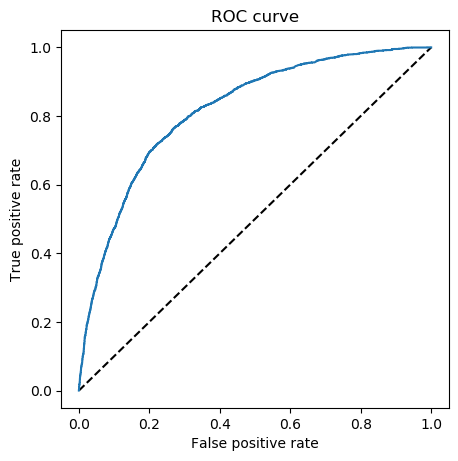

In [80]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(5,5),dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
#print "%8.6f\t%8.6f\t%d\t%s\t%8.6f"%((con_f[0,0]+con_f[1,1])/float(total),con_f[0,1]/float(total),n,mx,roc_auc)
#print '%8.6f\t%d\t\t%s\t\t\t%d\t\t%d'%(roc_auc,n,mx,ms,msl)

                    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

In [81]:
y_pred=rf.predict(X_test)
con_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)


In [88]:
feature_df=pd.DataFrame()
feature_df['feats']=X.columns
feature_df['importances']=rf.feature_importances_
feature_df.sort_values('importances',ascending=False,inplace=True)
feature_df

,feats,importances
4,surge_pct,0.201111
1,avg_rating_by_driver,0.187137
3,avg_surge,0.142556
6,weekday_pct,0.107165
8,city_King's Landing,0.076540
5,trips_in_first_30_days,0.059067
10,phone_Android,0.050021
11,phone_iPhone,0.047905
13,ultimate_black_user_True,0.037568
12,ultimate_black_user_False,0.034178


The above table  shows the features for the random forrest model created ranked by importance. Surge pricing and avg_rating_by_driver are top two features in the table. It indicate that Ultimate might pay more attention to customer's experience on the trip to improve longterm rider retention. On one hand, the rating by the driver represents a loose analysis of the customer's behaviour all of which can reflect a customer's experience on the trip. One the other hand,Surge pricing shows up in the top ten, weekday percentage has a likely correlation with business use, etc.